In [360]:
#importing the dependencies
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import jaccard_score, f1_score

In [361]:
#loading the saved model
model = load_model("improved_unet_glaucoma.h5", compile=False)

In [362]:
#loading the preprocess test image
def preprocess_image(image_path, target_size=(256, 256)):
    image = imread(image_path)  
    image = resize(image, target_size, anti_aliasing=True)  # Resize to model input shape
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

test_image_path = "ORIGA/Images/023.jpg"  # Change this to your test image path
test_image = preprocess_image(test_image_path)

In [363]:
#get the predection 
predicted_mask = model.predict(test_image)
predicted_mask = (predicted_mask_raw > 0.001).astype(np.uint8)# Adjust the threshold , Convert to binary mask

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [364]:
#load ground truth mask for evaluation
def preprocess_mask(mask_path, target_size=(256, 256)):
    mask = imread(mask_path, as_gray=True)  
    mask = resize(mask, target_size, anti_aliasing=True)  # Resize
    mask = np.expand_dims(mask, axis=0)  # Add batch dimension
    mask = (mask > 0.5).astype(np.uint8)  # Convert to binary
    return mask

ground_truth_path = "ORIGA/Masks/023.png" 
ground_truth_mask = ground_truth_mask.reshape(1, 256, 256, 1)# Change this to your ground truth mask path
ground_truth_mask = (ground_truth_mask > 0).astype(np.uint8)# Ensure it has shape (1, 256, 256, 1))
ground_truth_mask = np.squeeze(ground_truth_mask)

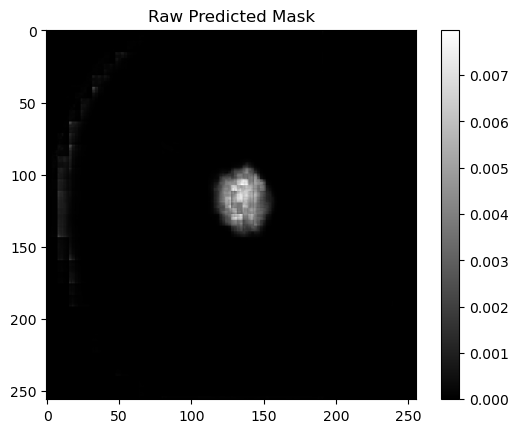

In [365]:
plt.imshow(predicted_mask_raw[0, :, :, 0], cmap="gray")
plt.colorbar()
plt.title("Raw Predicted Mask")
plt.show()

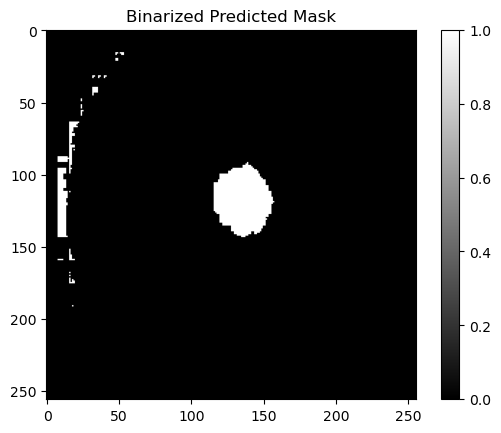

In [366]:
threshold = 0.0005  # Adjust if needed
binary_mask = (predicted_mask_raw > threshold).astype(np.uint8)

plt.imshow(binary_mask[0, :, :, 0], cmap="gray")
plt.colorbar()
plt.title("Binarized Predicted Mask")
plt.show()

In [367]:
print(f"Min & Max Predicted Values: {predicted_mask_raw.min()}, {predicted_mask_raw.max()}")


Min & Max Predicted Values: 6.42275437749782e-17, 0.0079826470464468


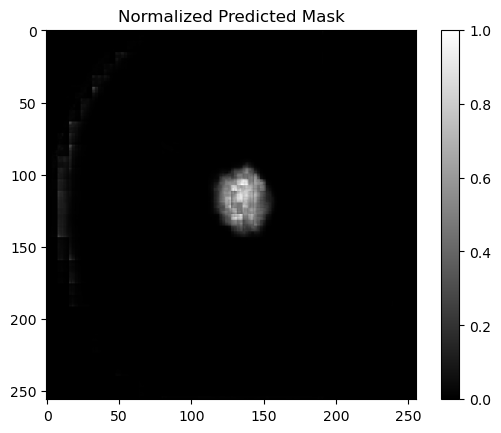

In [368]:
normalized_mask = (predicted_mask_raw - predicted_mask_raw.min()) / (predicted_mask_raw.max() - predicted_mask_raw.min())
plt.imshow(normalized_mask[0, :, :, 0], cmap="gray")
plt.colorbar()
plt.title("Normalized Predicted Mask")
plt.show()


Unique values in mask: [0 1 2]


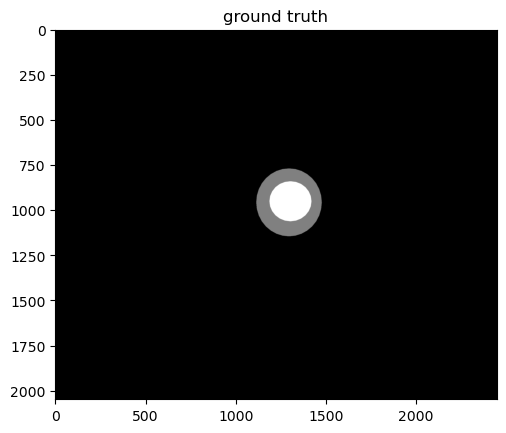

In [369]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

mask_path = "ORIGA/Masks/023.png"
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

print("Unique values in mask:", np.unique(mask))  # Check pixel values
plt.imshow(mask, cmap='gray')
plt.title("ground truth")
plt.show()


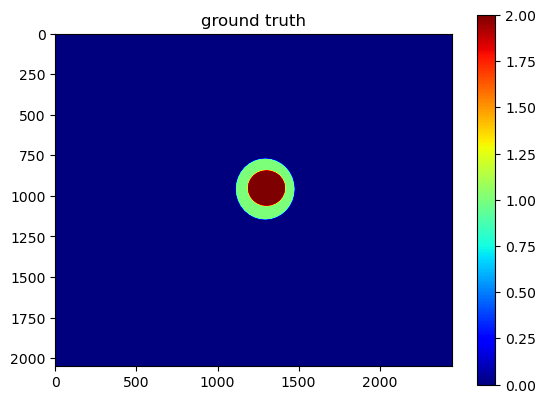

In [370]:
plt.imshow(mask, cmap='jet')  # Use 'jet' or another colormap for multi-class masks
plt.colorbar()
plt.title("ground truth")
plt.show()


In [371]:
mask = cv2.imread(mask_path)
print("Unique colors in mask:", np.unique(mask.reshape(-1, mask.shape[2]), axis=0))


Unique colors in mask: [[0 0 0]
 [1 1 1]
 [2 2 2]]


Unique values after conversion: [0 1]


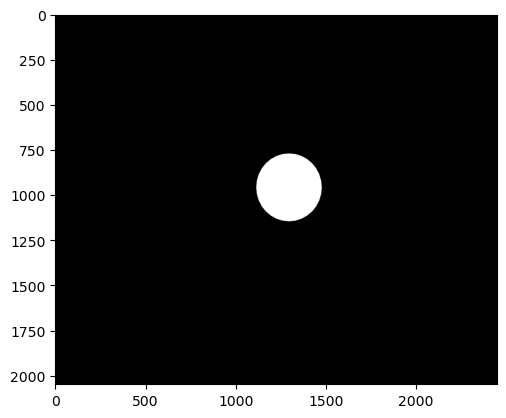

In [372]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load mask (grayscale)
mask_path = "ORIGA/Masks/023.png"
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Convert to binary: Set all nonzero values to 1
binary_mask = np.where(mask > 0, 1, 0).astype(np.uint8)

# Verify unique values
print("Unique values after conversion:", np.unique(binary_mask))

# Display mask
plt.imshow(binary_mask, cmap='gray')
plt.show()

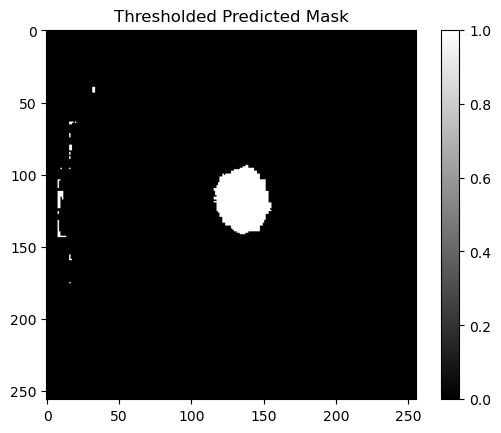

In [373]:
plt.imshow(predicted_mask.squeeze(), cmap="gray")
plt.title("Thresholded Predicted Mask")
plt.colorbar()
plt.show()

Unique values after conversion: [0 1]


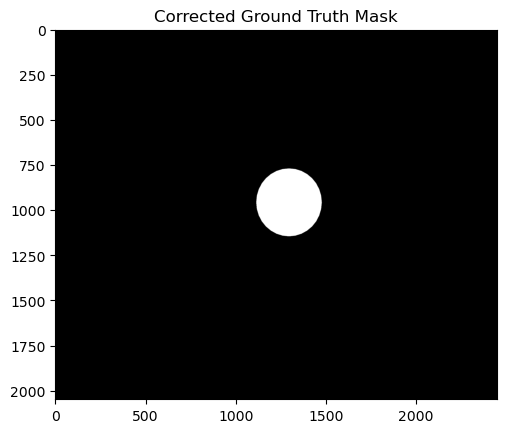

In [374]:
# Convert the mask to binary if it's a binary segmentation problem
binary_mask = np.where(mask > 0, 1, 0).astype(np.uint8)  # Convert to 0 and 1

print("Unique values after conversion:", np.unique(binary_mask))

# Display the corrected mask
plt.imshow(binary_mask, cmap="gray")
plt.title("Corrected Ground Truth Mask")
plt.show()


In [375]:
from sklearn.metrics import jaccard_score, f1_score

def compute_metrics(y_true, y_pred):
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    
    # Check if both masks are completely empty
    if np.sum(y_true_flat) == 0 and np.sum(y_pred_flat) == 0:
        return 1.0, 1.0  # Perfect match (both are empty)
    
    # If one mask is empty but the other is not, return 0
    if np.sum(y_true_flat) == 0 or np.sum(y_pred_flat) == 0:
        return 0.0, 0.0  # No match
    
    iou = jaccard_score(y_true_flat, y_pred_flat)  # IoU
    dice = f1_score(y_true_flat, y_pred_flat)  # Dice Coefficient 
    
    return iou, dice

iou_score, dice_score = compute_metrics(ground_truth_mask, predicted_mask)
print(f"IoU Score: {iou_score:.4f}")
print(f"Dice Score: {dice_score:.4f}")


IoU Score: 0.0000
Dice Score: 0.0000


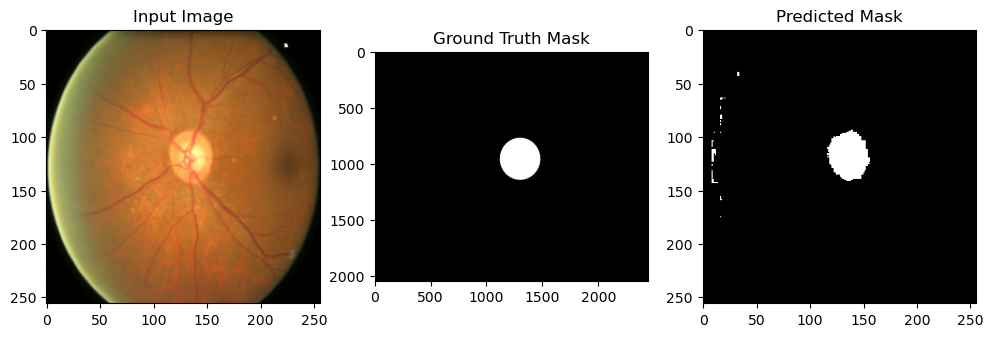

In [376]:
binary_mask = np.where(mask > 0, 1, 0).astype(np.uint8)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(test_image[0])  # Show input image
plt.title("Input Image")

plt.subplot(1, 3, 2)
plt.imshow(binary_mask, cmap="gray", vmin=0, vmax=1)
  # Show ground truth
plt.title("Ground Truth Mask")

plt.subplot(1, 3, 3)
plt.imshow(predicted_mask.squeeze(), cmap="gray")  # Show predicted mask
plt.title("Predicted Mask")

plt.show()



In [377]:
print(f"Test Image Shape: {test_image.shape}")
print(f"Ground Truth Mask Shape: {ground_truth_mask.shape}")

predicted_mask_raw = model.predict(test_image)
print(f"Predicted Mask Shape: {predicted_mask_raw.shape}")
print(f"Min & Max Predicted Values: {predicted_mask_raw.min()}, {predicted_mask_raw.max()}")


Test Image Shape: (1, 256, 256, 3)
Ground Truth Mask Shape: (256, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step
Predicted Mask Shape: (1, 256, 256, 1)
Min & Max Predicted Values: 6.42275437749782e-17, 0.0079826470464468
